<a href="https://colab.research.google.com/github/jiuyuanx/94812/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
from torch.nn.functional import softmax
import torch
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)

Device:  cpu


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/94812/hw1/bbc_sentiment.csv')
df

,Unnamed: 0,topic,content,sentiment,score
0,0,business,Golden rule 'intact' says ex-aide\n\nChancello...,Negative,0.003080
1,1,business,Beer giant swallows Russian firm\n\nBrewing gi...,Neutral,0.687573
2,2,business,Deutsche Boerse set to 'woo' LSE\n\nBosses of ...,Negative,0.000259
3,3,business,GM in crunch talks on Fiat future\n\nFiat will...,Negative,0.001180
4,4,business,Sluggish economy hits German jobs\n\nThe numbe...,Negative,0.000155
...,...,...,...,...,...
2220,2220,tech,Fast moving phone viruses appear\n\nSecurity f...,Negative,0.000176
2221,2221,tech,Musical future for phones\n\nAnalyst Bill Thom...,Positive,0.961024
2222,2222,tech,'No re-draft' for EU patent law\n\nA proposed ...,Negative,0.000900
2223,2223,tech,Apple sues 'Tiger' file sharers\n\nApple has t...,Negative,0.000158


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Apple is looking at buying U.K. startup for $1 billion"

output = nlp(text)

for ent in output.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [8]:
from tqdm.auto import tqdm
results= []
for i in tqdm(range(len(df)), "inferencing..."):
    text = df.iloc[i]['content']
    output= nlp(text)
    l = [(ent.text, ent.label_) for ent in output.ents]
    results.append(l)

df['ner'] = results
df

inferencing...:   0%|          | 0/2225 [00:00<?, ?it/s]

,Unnamed: 0,topic,content,sentiment,score,ner
0,0,business,Golden rule 'intact' says ex-aide\n\nChancello...,Negative,0.003080,"[(Gordon Brown, PERSON), (Mr Brown's, ORG), (T..."
1,1,business,Beer giant swallows Russian firm\n\nBrewing gi...,Neutral,0.687573,"[(Russian, NORP), (Inbev, ORG), (Alfa-Eco's, O..."
2,2,business,Deutsche Boerse set to 'woo' LSE\n\nBosses of ...,Negative,0.000259,"[(Deutsche Boerse, ORG), (Deutsche Boerse, ORG..."
3,3,business,GM in crunch talks on Fiat future\n\nFiat will...,Negative,0.001180,"[(GM, ORG), (Fiat, ORG), (Fiat, ORG), (General..."
4,4,business,Sluggish economy hits German jobs\n\nThe numbe...,Negative,0.000155,"[(German, NORP), (Europe, LOC), (the tenth str..."
...,...,...,...,...,...,...
2220,2220,tech,Fast moving phone viruses appear\n\nSecurity f...,Negative,0.000176,"[(Cabir, ORG), (Cabir, GPE), (the Symbian Seri..."
2221,2221,tech,Musical future for phones\n\nAnalyst Bill Thom...,Positive,0.961024,"[(Bill Thompson, PERSON), (Max, PERSON), (3, C..."
2222,2222,tech,'No re-draft' for EU patent law\n\nA proposed ...,Negative,0.000900,"[(EU, ORG), (European, NORP), (the European Co..."
2223,2223,tech,Apple sues 'Tiger' file sharers\n\nApple has t...,Negative,0.000158,"[(Apple, ORG), (Apple, ORG), (three, CARDINAL)..."


In [9]:
import numpy as np
ner_list = df['ner'].values
ner = [j[1] for i in ner_list for j in i]
ner_unique = np.unique(np.array(ner)) #'B-MISC', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'
print(len(ner_unique))
ner_unique

18


array(['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW',
       'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON',
       'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART'], dtype='<U11')

In [12]:
count = {i:[0]*18 for i in np.unique(df['topic'].values)}
#{'business': [0, 0, 0, 0, 0, 0...],
#  'entertainment': [0, 0, 0, 0, 0, 0...],
#  'politics': [0, 0, 0, 0, 0, 0...],
#  'sport': [0, 0, 0, 0, 0, 0...],
#  'tech': [0, 0, 0, 0, 0, 0...]}
map = list(ner_unique)
for i in tqdm(range(len(df))):
  row = df.iloc[i]
  ls = row['ner']
  cat = row['topic']
  for l in ls:
    item = l[1]
    count[cat][map.index(item)]+=1
count

  0%|          | 0/2225 [00:00<?, ?it/s]

{'business': [1536,
  3840,
  36,
  33,
  3345,
  2,
  34,
  335,
  1372,
  1051,
  275,
  4739,
  1259,
  2401,
  121,
  61,
  82,
  47],
 'entertainment': [1380,
  2465,
  100,
  219,
  1813,
  17,
  20,
  147,
  541,
  661,
  459,
  2796,
  79,
  4764,
  126,
  16,
  129,
  430],
 'politics': [1124,
  2217,
  79,
  131,
  1967,
  25,
  44,
  235,
  320,
  1375,
  318,
  3510,
  203,
  4264,
  83,
  11,
  109,
  103],
 'sport': [2171,
  2994,
  503,
  194,
  3992,
  38,
  25,
  159,
  84,
  1001,
  976,
  3474,
  23,
  6936,
  105,
  89,
  346,
  123],
 'tech': [1933,
  2027,
  35,
  46,
  1759,
  38,
  27,
  239,
  330,
  508,
  369,
  4470,
  385,
  2034,
  245,
  73,
  152,
  83]}

In [14]:
count.values()

dict_values([[1536, 3840, 36, 33, 3345, 2, 34, 335, 1372, 1051, 275, 4739, 1259, 2401, 121, 61, 82, 47], [1380, 2465, 100, 219, 1813, 17, 20, 147, 541, 661, 459, 2796, 79, 4764, 126, 16, 129, 430], [1124, 2217, 79, 131, 1967, 25, 44, 235, 320, 1375, 318, 3510, 203, 4264, 83, 11, 109, 103], [2171, 2994, 503, 194, 3992, 38, 25, 159, 84, 1001, 976, 3474, 23, 6936, 105, 89, 346, 123], [1933, 2027, 35, 46, 1759, 38, 27, 239, 330, 508, 369, 4470, 385, 2034, 245, 73, 152, 83]])

In [16]:
df_count = pd.DataFrame(count.values(), columns = ner_unique, index = np.unique(df['topic'].values))
df_count

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
business,1536,3840,36,33,3345,2,34,335,1372,1051,275,4739,1259,2401,121,61,82,47
entertainment,1380,2465,100,219,1813,17,20,147,541,661,459,2796,79,4764,126,16,129,430
politics,1124,2217,79,131,1967,25,44,235,320,1375,318,3510,203,4264,83,11,109,103
sport,2171,2994,503,194,3992,38,25,159,84,1001,976,3474,23,6936,105,89,346,123
tech,1933,2027,35,46,1759,38,27,239,330,508,369,4470,385,2034,245,73,152,83


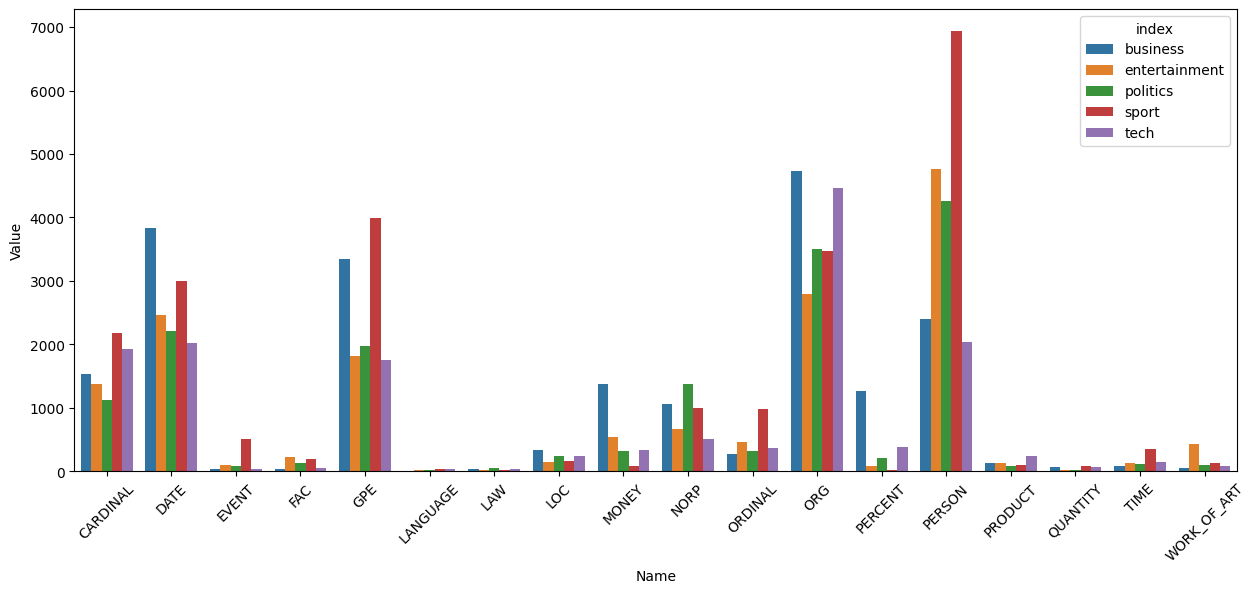

In [38]:
df_long = df_count.reset_index().melt(id_vars='index', var_name='Name', value_name='Value')

plt.figure(figsize=(15, 6))
sns.barplot(x='Name', y='Value', hue='index', data=df_long)
plt.xticks(rotation=45)
plt.show()

Person and Organization has the highest number of appearances in the dataset.\
Sports has the highest number of persons.\
Business has the highest number of organizations.

We can see with a threshold 0.25, 0.75(p>0.75 positive, p<0.25 negative, 0.25~0.75 neutral)
There are still very few neutral classes. We can say Bert model fined tuned on yelp polarity dataset is very confident and extreme about the sentiment prediction. \
Tech and Sport articles have more neutral classes than others.

In [ ]:
df.to_csv("bbc_sentiment.csv")